/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


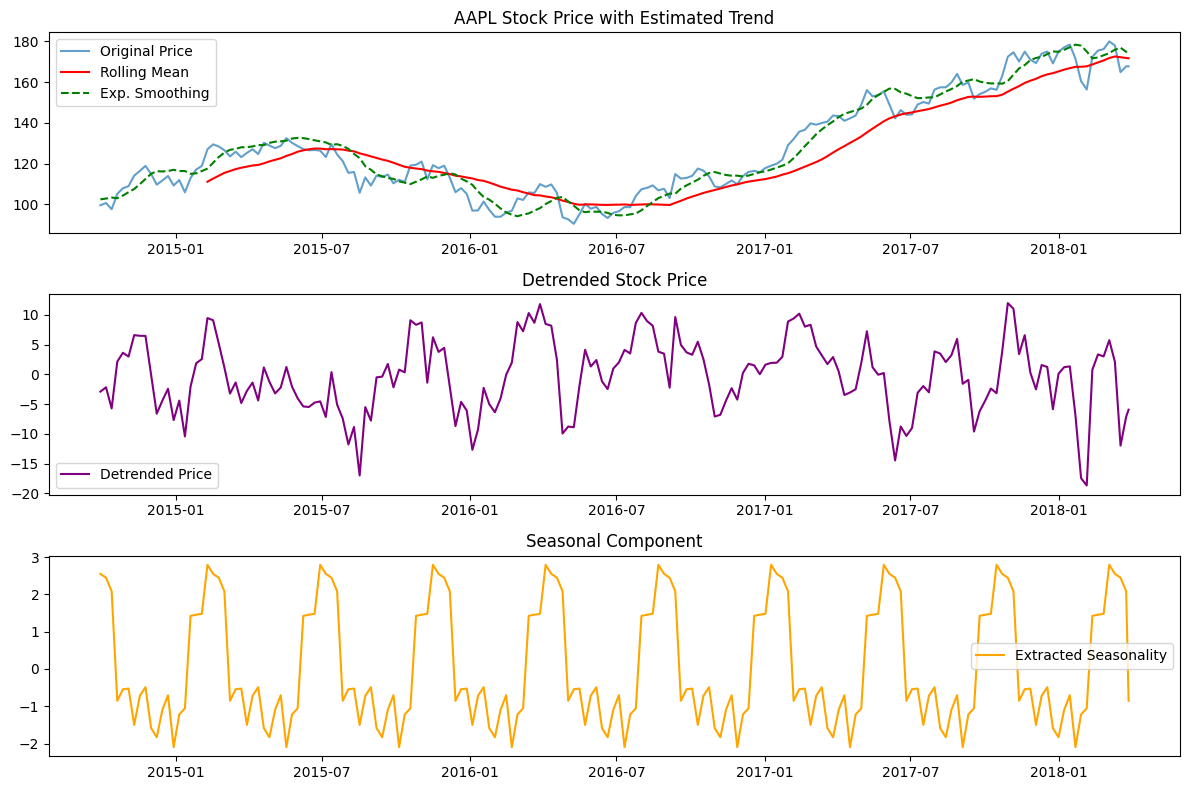

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load AAPL stock data (modify 'Date' column name if needed)
df = pd.read_csv("/content/AAPL.csv", parse_dates=["Date"], index_col="Date")

# Ensure the dataset is sorted by date
df = df.sort_index()

# Select relevant column (modify if needed)
df["Price"] = df["Close"]  # Change if needed (e.g., "Adj Close")

# Aggregation using Rolling Mean (Moving Average)
window_size = 20  # Adjust window size as needed
df["Rolling_Mean"] = df["Price"].rolling(window=window_size).mean()

# Exponential Smoothing for trend estimation
model = ExponentialSmoothing(df["Price"], trend="additive", seasonal=None)
fit = model.fit(smoothing_level=0.2, optimized=True)
df["Exp_Smooth"] = fit.fittedvalues

# Detrended Data (Original - Estimated Trend)
df["Detrended"] = df["Price"] - df["Exp_Smooth"]

# Seasonal Decomposition
decomposition = seasonal_decompose(df["Price"], model="additive", period=window_size)
df["Trend"] = decomposition.trend
df["Seasonal"] = decomposition.seasonal
df["Residual"] = decomposition.resid

# Plot Results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.index, df["Price"], label="Original Price", alpha=0.7)
plt.plot(df.index, df["Rolling_Mean"], label="Rolling Mean", color="red")
plt.plot(df.index, df["Exp_Smooth"], label="Exp. Smoothing", color="green", linestyle="dashed")
plt.legend()
plt.title("AAPL Stock Price with Estimated Trend")

plt.subplot(3, 1, 2)
plt.plot(df.index, df["Detrended"], label="Detrended Price", color="purple")
plt.legend()
plt.title("Detrended Stock Price")

plt.subplot(3, 1, 3)
plt.plot(df.index, df["Seasonal"], label="Extracted Seasonality", color="orange")
plt.legend()
plt.title("Seasonal Component")

plt.tight_layout()
plt.show()
